In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv


In [3]:
df=pd.read_csv("/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv")

In [4]:
df.head(3)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


In [5]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [11]:
df.shape

(25000, 3)

In [7]:
df.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

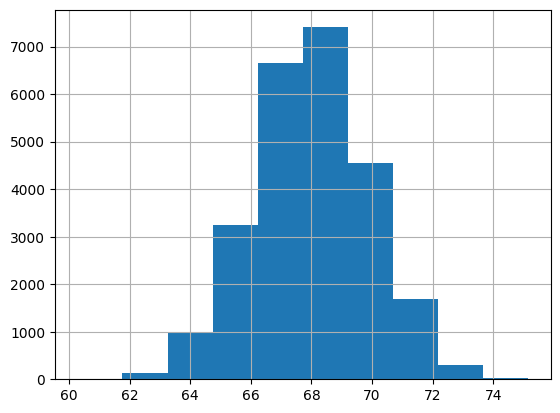

In [13]:
df['Height(Inches)'].hist()

<Axes: >

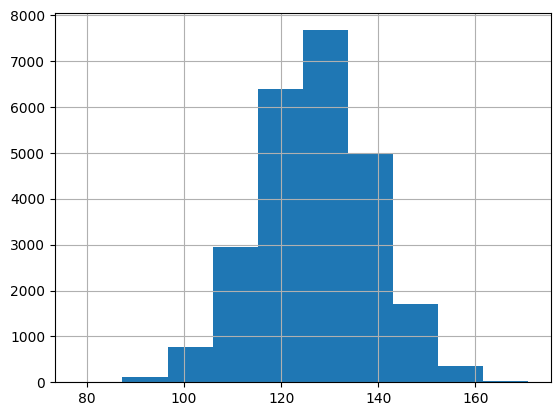

In [14]:
df['Weight(Pounds)'].hist()

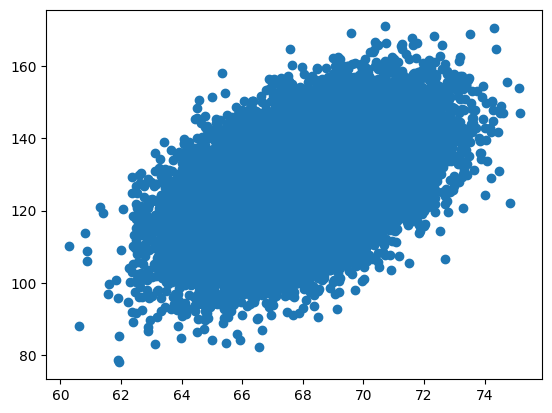

In [16]:
plt.scatter(df["Height(Inches)"], df['Weight(Pounds)'])
plt.show()

In [26]:
x=df[['Height(Inches)']]
y=df[['Weight(Pounds)']]

In [27]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [51]:
df_lr=lr.fit(x_train,y_train)

In [52]:
df_lr.score(x_test,y_test),df_lr.score(x_train,y_train)

(0.2576604247312212, 0.2516460018228236)

In [53]:
df_lr.predict([[65.78331]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[120.31647285]])

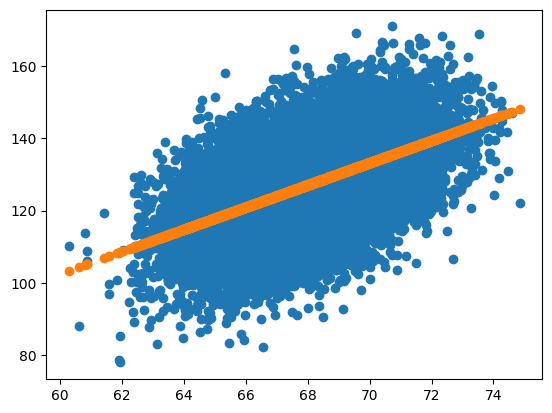

In [58]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,df_lr.predict(x_train))
plt.show()

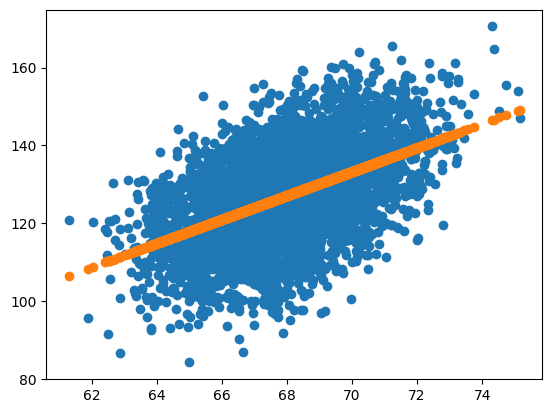

In [60]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,df_lr.predict(x_test))